In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np

In [2]:
df = pd.read_csv("student_performance_prediction.csv")

In [3]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [4]:
df["Participation in Extracurricular Activities"].unique()

array(['Yes', 'No', nan], dtype=object)

In [5]:
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].map({"No": 0, "Yes": 1})

In [6]:
df["Parent Education Level"].unique()

array(['Master', 'High School', 'Associate', 'Bachelor', 'Doctorate', nan],
      dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder
education = [
    "High School",
    "Associate",
    "Bachelor",
    "Master",
    "Doctorate",
]

encoder = OrdinalEncoder(categories=[education], handle_unknown="use_encoded_value", unknown_value=np.nan)
df["Parent Education Level"] = encoder.fit_transform(df[["Parent Education Level"]])

In [8]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,1.0,3.0,Yes
1,S00002,9.3,95.3,60.6,0.0,0.0,No
2,S00003,13.2,NaN,64.0,0.0,1.0,No
3,S00004,17.6,76.8,62.4,1.0,2.0,No
4,S00005,8.8,89.3,72.7,0.0,3.0,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,1.0,3.0,No
39996,S39997,11.3,66.4,64.2,0.0,4.0,Yes
39997,S39998,13.1,65.6,38.1,0.0,2.0,No
39998,S39999,14.1,74.9,NaN,1.0,3.0,No


In [9]:
df["Passed"].unique()

array(['Yes', 'No', nan], dtype=object)

In [10]:
df["Passed"] = df["Passed"].map({"No": 0, "Yes": 1})

In [11]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,1.0,3.0,1.0
1,S00002,9.3,95.3,60.6,0.0,0.0,0.0
2,S00003,13.2,NaN,64.0,0.0,1.0,0.0
3,S00004,17.6,76.8,62.4,1.0,2.0,0.0
4,S00005,8.8,89.3,72.7,0.0,3.0,0.0
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,1.0,3.0,0.0
39996,S39997,11.3,66.4,64.2,0.0,4.0,1.0
39997,S39998,13.1,65.6,38.1,0.0,2.0,0.0
39998,S39999,14.1,74.9,NaN,1.0,3.0,0.0


In [12]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [13]:
df.dropna(subset=["Passed"], axis=0, inplace=True)

In [14]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1905
Attendance Rate                                1888
Previous Grades                                1877
Participation in Extracurricular Activities    1902
Parent Education Level                         1898
Passed                                            0
dtype: int64

In [15]:
df["Study Hours per Week"] = df["Study Hours per Week"].fillna(df["Study Hours per Week"].median())

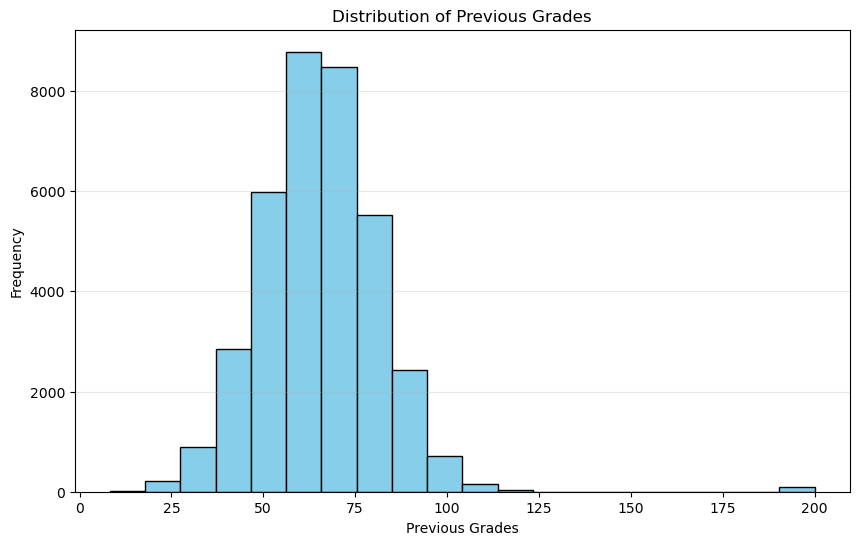

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["Previous Grades"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Previous Grades")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Grades")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [17]:
df["Previous Grades"] = df["Previous Grades"].fillna(df["Previous Grades"].median())

In [18]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                1888
Previous Grades                                   0
Participation in Extracurricular Activities    1902
Parent Education Level                         1898
Passed                                            0
dtype: int64

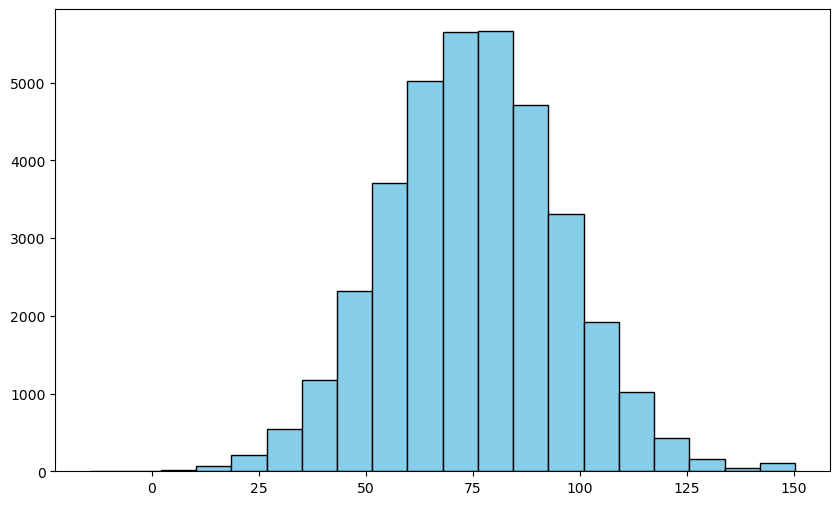

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df["Attendance Rate"], bins=20, color='skyblue', edgecolor='black')
plt.show()

In [20]:
df["Attendance Rate"] = df["Attendance Rate"].fillna(df["Attendance Rate"].median())

In [21]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    1902
Parent Education Level                         1898
Passed                                            0
dtype: int64

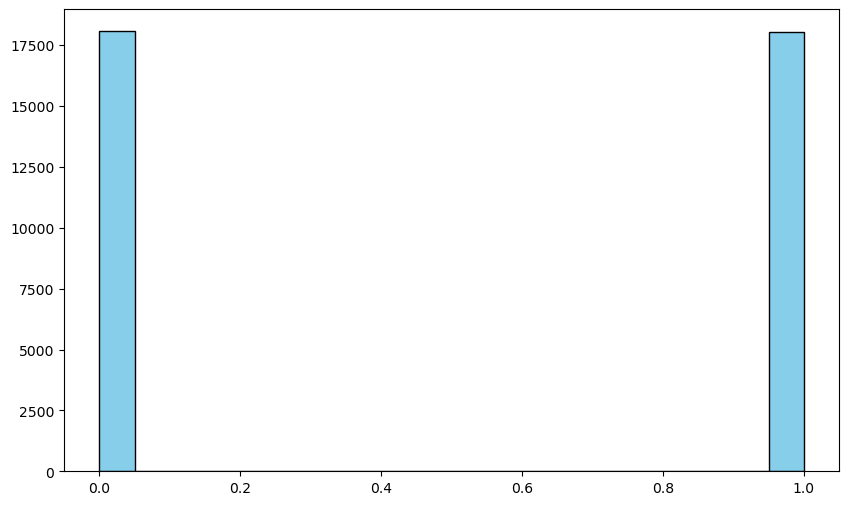

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df["Participation in Extracurricular Activities"], bins=20, color='skyblue', edgecolor='black')
plt.show()

In [23]:
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].fillna(df["Participation in Extracurricular Activities"].mode()[0])

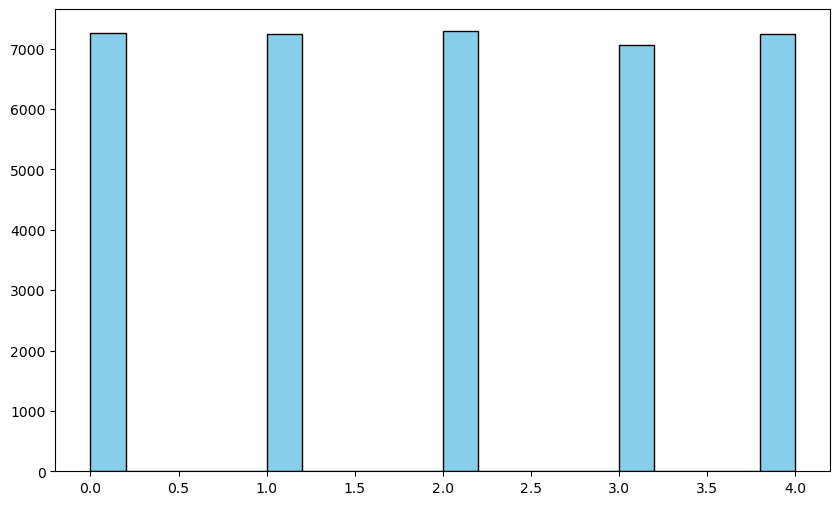

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df["Parent Education Level"], bins=20, color='skyblue', edgecolor='black')
plt.show()

In [25]:
df["Parent Education Level"] = df["Parent Education Level"].fillna(df["Parent Education Level"].mode()[0])

In [26]:
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.2,75.0,1.0,3.0,1.0
1,S00002,9.3,95.3,60.6,0.0,0.0,0.0
2,S00003,13.2,75.2,64.0,0.0,1.0,0.0
3,S00004,17.6,76.8,62.4,1.0,2.0,0.0
4,S00005,8.8,89.3,72.7,0.0,3.0,0.0
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,1.0,3.0,0.0
39996,S39997,11.3,66.4,64.2,0.0,4.0,1.0
39997,S39998,13.1,65.6,38.1,0.0,2.0,0.0
39998,S39999,14.1,74.9,65.2,1.0,3.0,0.0


In [27]:
df.drop(columns=["Student ID"], axis=1, inplace=True)

In [28]:
x, y = df.drop(columns=["Passed"]), df["Passed"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x_train, y_train)
pred = model.predict(x_test)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      3839
         1.0       0.50      0.51      0.51      3761

    accuracy                           0.51      7600
   macro avg       0.51      0.51      0.51      7600
weighted avg       0.51      0.51      0.51      7600

